In [139]:
#import libraries and set plot styles
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [140]:
#Get and prepare data
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [141]:
data.shape

(569, 33)

In [142]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [143]:
pca_data = data.drop(['Unnamed: 32','id','diagnosis'],axis=1)

In [144]:
pca_data.shape

(569, 30)

In [145]:
# Apply PCA
##  Obtain the feature matrix
X = pca_data.values
X.shape

(569, 30)

In [146]:
##  Standardize the features if necessary
###   import the class
from sklearn.preprocessing import  StandardScaler
###   create the object
scaler = StandardScaler()
###   calculate the mean and standard deviation 
scaler.fit(X)
###   transform the values 
X_scaled = scaler.transform(X)

In [147]:
##  Choose the right number of dimensions (k)
from sklearn.decomposition import PCA
pca_30 = PCA(n_components=30 ,random_state=2020)
pca_30.fit (X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

In [148]:
print("Variance explained by all 30 principal components = " , sum(pca_30.explained_variance_ratio_*100))

Variance explained by all 30 principal components =  100.0


In [149]:
pca_30.explained_variance_ratio_*100

array([4.42720256e+01, 1.89711820e+01, 9.39316326e+00, 6.60213492e+00,
       5.49576849e+00, 4.02452204e+00, 2.25073371e+00, 1.58872380e+00,
       1.38964937e+00, 1.16897819e+00, 9.79718988e-01, 8.70537901e-01,
       8.04524987e-01, 5.23365745e-01, 3.13783217e-01, 2.66209337e-01,
       1.97996793e-01, 1.75395945e-01, 1.64925306e-01, 1.03864675e-01,
       9.99096464e-02, 9.14646751e-02, 8.11361259e-02, 6.01833567e-02,
       5.16042379e-02, 2.72587995e-02, 2.30015463e-02, 5.29779290e-03,
       2.49601032e-03, 4.43482743e-04])

In [150]:
np.cumsum(pca_30.explained_variance_ratio_*100)

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

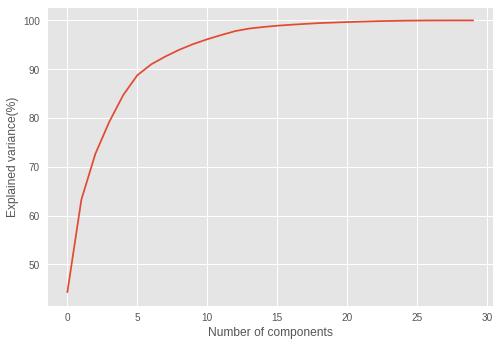

In [151]:
plt.plot(np.cumsum(pca_30.explained_variance_ratio_* 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance(%)")
plt.savefig("elbow_plot.png", dpi = 100)

In [152]:
print("variance explained by the First principal component=", np.cumsum(pca_30.explained_variance_ratio_*100)[0])
print("variance explained by the First 2 principal component=", np.cumsum(pca_30.explained_variance_ratio_*100)[1])
print("variance explained by the First 3 principal component=", np.cumsum(pca_30.explained_variance_ratio_*100)[2])
print("variance explained by the First 10 principal component=", np.cumsum(pca_30.explained_variance_ratio_*100)[9])

variance explained by the First principal component= 44.27202560752635
variance explained by the First 2 principal component= 63.243207651559416
variance explained by the First 3 principal component= 72.6363709089908
variance explained by the First 10 principal component= 95.15688143366667


In [153]:
##  Apply PCA by setting n_components=2
pca_2 = PCA(n_components=2,random_state=2020)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

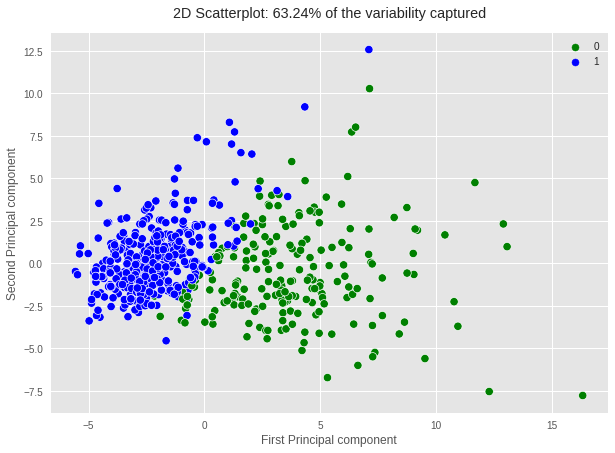

In [154]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:,1], s=70, hue=cancer.target, palette=['green', 'blue'])
plt.title("2D Scatterplot: 63.24% of the variability captured",pad=15)
plt.xlabel("First Principal component")
plt.ylabel("Second Principal component")
plt.savefig("2d_scatterplot.png")

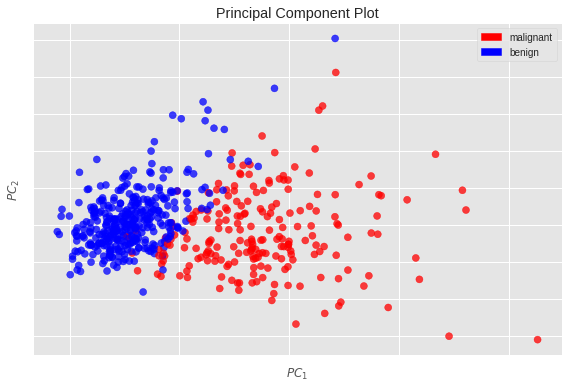

In [155]:
from yellowbrick.features import PCA
visualizer_2 = PCA (scale = True , projection= 2, classes=['malignant', 'benign'], random_state=2020 , colors=['red', 'blue'])
visualizer_2.fit_transform(X, cancer.target)
visualizer_2.show(output= '2d_scatterplot_y.png')

In [167]:
##  Apply PCA by setting n_components=3
from sklearn.decomposition import PCA
pca_3 = PCA(n_components=3,random_state=2020)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

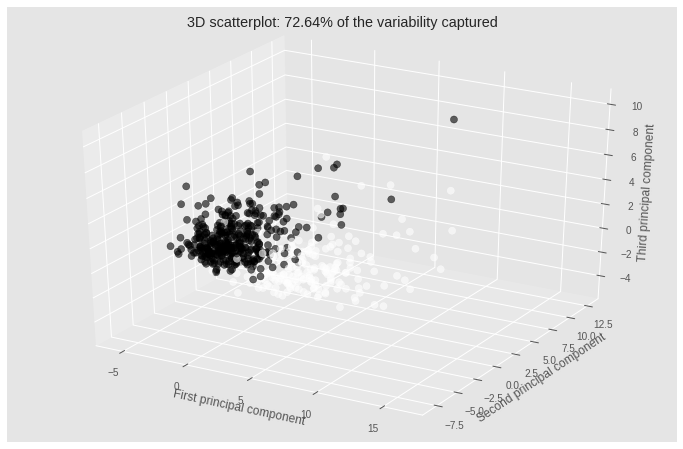

In [177]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12,8))
ax =  plt.axes(projection = '3d')
sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:,1],X_pca_3[:,2],c= cancer.target, s=50, alpha=0.6)
plt.title("3D scatterplot: 72.64% of the variability captured",pad = 15)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
plt.savefig('3d_scatterplot.png')

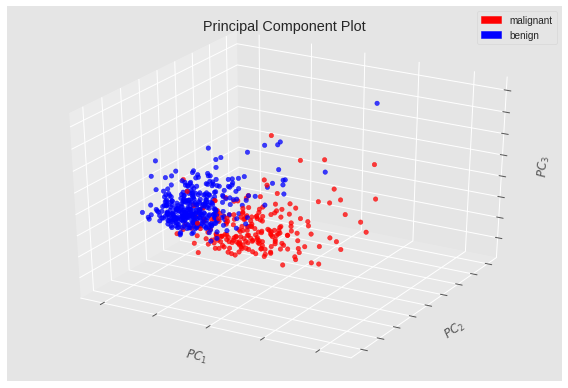

In [182]:
from yellowbrick.features import PCA
visualizer_3 = PCA (scale = True , projection= 3, classes=['malignant', 'benign'], random_state=2020 , colors=['red', 'blue'])
visualizer_3.fit_transform(X, cancer.target)
visualizer_3.show(output= '3d_scatterplot_y.png')

In [194]:
##  Apply PCA by setting n_components=0.95
from sklearn.decomposition import PCA
pca_95 = PCA(n_components= 0.95 , random_state=2020)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)

In [195]:
X_pca_95.shape

(569, 10)

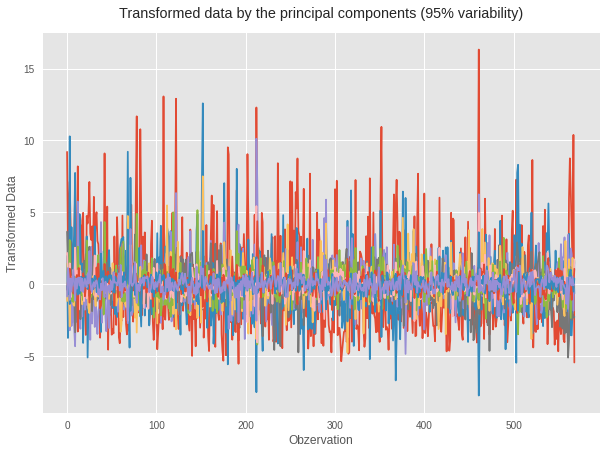

In [196]:
plt.figure(figsize = (10,7))
plt.plot(X_pca_95)
plt.xlabel('Obzervation')
plt.ylabel('Transformed Data')
plt.title('Transformed data by the principal components (95% variability)', pad = 15)
plt.savefig('plot.png')


In [197]:
data_new = pd.DataFrame(X_pca_95, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
data_new['label']= cancer.target
data_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0


In [199]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [205]:
x = data_new.iloc[:, :-1].values
y = data_new.iloc[:, 10].values

In [207]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=2020)  

In [208]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

In [209]:
#Predicting the Test set result;  
y_pred= regressor.predict(x_test) 

In [212]:
#Checking the score  : R 2 score used when calling score on a regressor uses multioutput='uniform_average'
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))  

Train Score:  0.7262239437474234
Test Score:  0.6631244900021721
